In [ ]:
# Импортируем библиотеки

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
# Считываем файл для дальнейшей работы

In [ ]:
df = pd.read_csv('sample_data/california_housing_train.csv')

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
# Данный график отображает зависимость средней стоимости дома от доходов.
# Можно увидеть, что график плавно смещается вправо, что говорит о том, чем выше доход населения, тем более дорогие дома выбираются.

<Axes: xlabel='median_income', ylabel='median_house_value'>

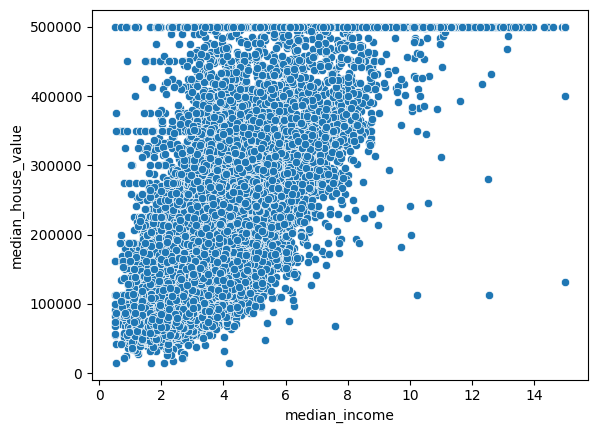

In [ ]:
sns.scatterplot(data = df, x = 'median_income', y = 'median_house_value')

In [ ]:
# Или, например, на данном графике видно, что молодежи больше там, где больше населения в целом.
# С помощью переменной 'hue' можно увидеть, что количество комнат больше в домах с бОльшим населением.

<Axes: xlabel='housing_median_age', ylabel='population'>

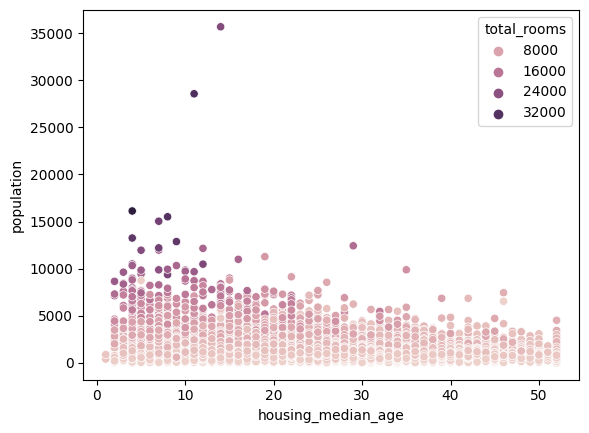

In [ ]:
sns.scatterplot(data = df, x = 'housing_median_age', y = 'population', hue = 'total_rooms')

In [ ]:
# Также можно изображать гистограммы.
# Например, следующая гистограмма показывает соотношение возрастных групп. Большинство населения составляю жильцы от 10 до 20 лет, от 30 до 40 и 50 +.

<Axes: xlabel='housing_median_age', ylabel='Count'>

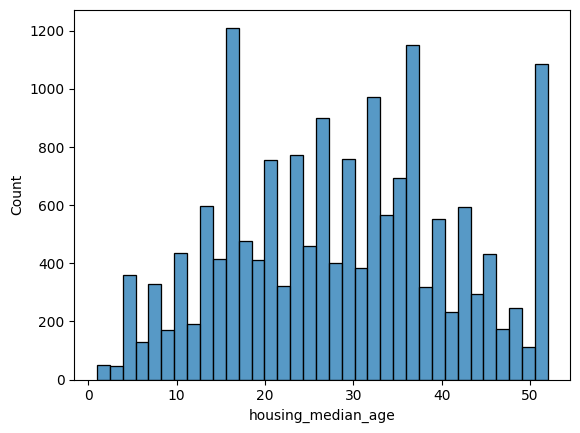

In [ ]:
sns.histplot(data = df, x = 'housing_median_age')

In [ ]:
# Можно посмотреть, например, в какой средней соимости домах, проживает большинство людей, в указанном возрастном промежутке.
# Видно, что это в основном дома от 100000 до 200000.

<Axes: xlabel='median_house_value', ylabel='Count'>

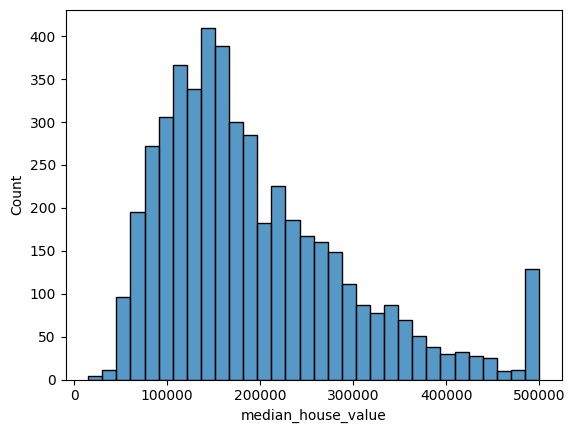

In [ ]:
sns.histplot(data = df[df['housing_median_age'] < 20], x = 'median_house_value')

In [ ]:
# Можно также создать группы параметров по своему усмотрению, чтобы проанализировать какие-либо зависимости.
# Например, ниже созданы группы стоимости домов.

In [ ]:
df.loc[df['median_house_value'] <= 200000, 'value_group'] = 'Низкая стоимость'
df.loc[(df['median_house_value'] > 200000) & (df['median_house_value'] <= 400000), 'value_group'] = 'Средняя стоимость'
df.loc[(df['median_house_value'] > 400000), 'value_group'] = 'Высокая стоимость'

In [ ]:
# Теперь можем вывести график зависимости, например, количества комнат и средней стоимости дома.
# Логично предположить, чем дороже дом, тем больше комнат.

<Axes: xlabel='value_group'>

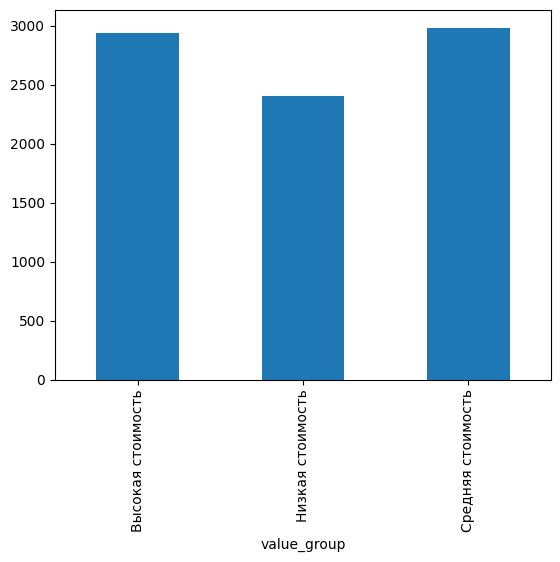

In [ ]:
df.groupby('value_group')['total_rooms'].mean().plot(kind = 'bar')